Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn import metrics
import graphviz
from sklearn.datasets import load_iris
from sklearn import tree
import os

In [2]:
df=pd.read_csv("black_friday.csv")

In [3]:
#Randomly Select Rows in Pandas
df = df.sample(n=100000, random_state=43)

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
273731,1000166,P00003042,M,18-25,4,B,1,1,8,NaN,NaN,7848
206530,1001836,P00279642,M,26-35,0,A,4+,0,7,NaN,NaN,20736
271860,1005886,P00358742,M,26-35,20,A,2,0,5,NaN,NaN,8674
170162,1002215,P00057442,F,26-35,0,B,2,1,5,14.0,16.0,5406
412155,1003474,P00067842,M,36-45,11,C,4+,1,6,10.0,16.0,16096


In [5]:
df.shape

(100000, 12)

In [6]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
df.describe().astype('int64')

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,100000,100000,100000,100000,68478,30362,100000
mean,1003027,8,0,5,9,12,9258
std,1727,6,0,3,5,4,5025
min,1000001,0,0,1,2,3,12
25%,1001514,2,0,1,5,9,5665
50%,1003073,7,0,5,9,14,8050
75%,1004474,14,1,8,15,16,12050
max,1006040,20,1,20,18,18,23956


In [8]:
#checking unique values
df.nunique()

User_ID                        5829
Product_ID                     3314
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      14077
dtype: int64

In [9]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated(keep='first')]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3, Purchase]
Index: []


In [10]:
df.shape

(100000, 12)

In [11]:
df.isnull().sum().sort_values(ascending=False)

Product_Category_3            69638
Product_Category_2            31522
Purchase                          0
Product_Category_1                0
Marital_Status                    0
Stay_In_Current_City_Years        0
City_Category                     0
Occupation                        0
Age                               0
Gender                            0
Product_ID                        0
User_ID                           0
dtype: int64

In [12]:
#lets drop 'Product_Category_3' as 70,000 data is missing and also drop 'User_ID','Product_ID'
#del df['User_ID']
#del df['Product_ID']
del df['Product_Category_3']

In [13]:
#Mean and median so we can take any one of them, lets go with the median
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].median())

Rechecking NaN values


In [14]:
df.isnull().sum().sort_values(ascending=False)

Purchase                      0
Product_Category_2            0
Product_Category_1            0
Marital_Status                0
Stay_In_Current_City_Years    0
City_Category                 0
Occupation                    0
Age                           0
Gender                        0
Product_ID                    0
User_ID                       0
dtype: int64

Visualization

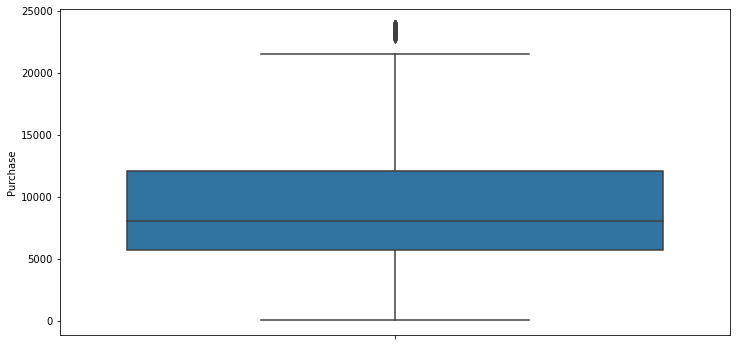

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df['Purchase'])

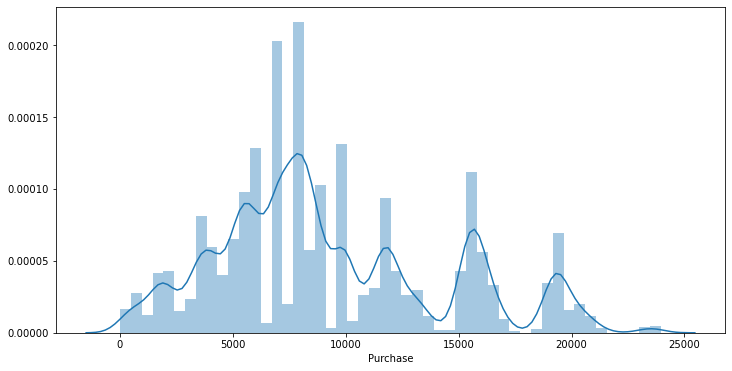

In [16]:
#We can see there is a pattern or segments of high peaks
plt.figure(figsize=(12,6))
sns.distplot(df['Purchase'])
plt.show()

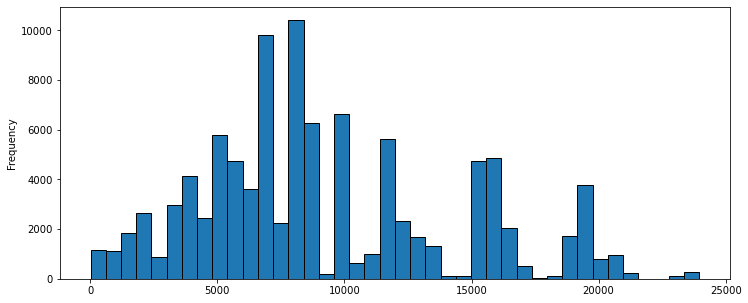

In [17]:
df['Purchase'].plot.hist(bins=40, edgecolor='k',figsize=(12,5))

# OCCUPATION effect on purchase

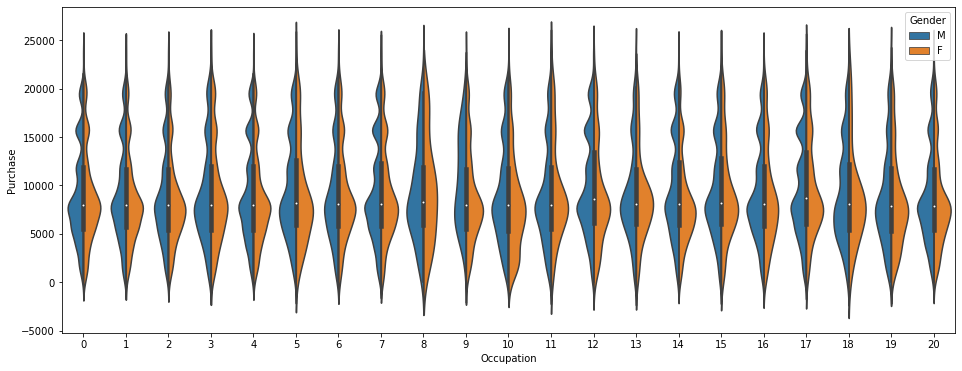

In [18]:
# df.boxplot('Purchase', by='Occupation', figsize=(14,4))
plt.figure(figsize=(16,6))
sns.violinplot(x='Occupation', y='Purchase', hue='Gender', split=True, data=df)

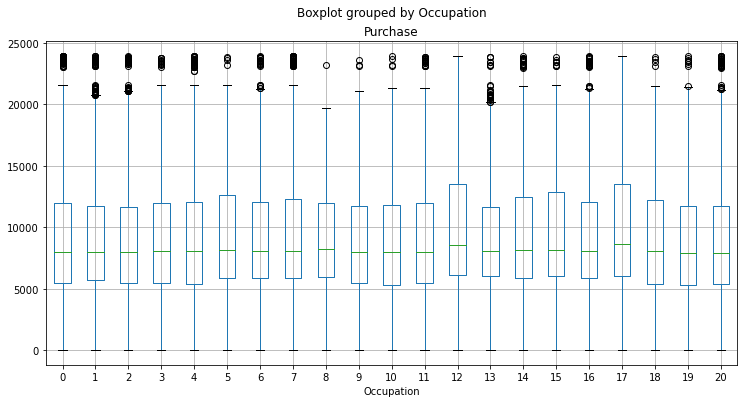

In [19]:
#There is not much variance in occupation
df.boxplot('Purchase', by='Occupation', figsize=(12,6))

In [20]:
#Relationship between Gender and purchase pattern
df[['Occupation', 'Purchase']].groupby(['Occupation'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Occupation,Purchase
12,12,9883.230955
17,17,9865.028026
15,15,9615.893345
5,5,9500.124491
14,14,9471.878552
8,8,9435.183453
7,7,9377.085325
6,6,9298.986696
16,16,9252.350603
18,18,9250.678143


# Gender effect on purchase

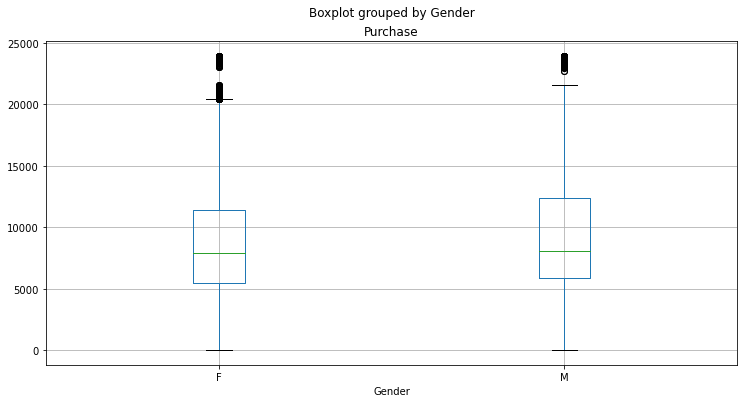

In [21]:
# sns.countplot(df['Gender'])
#There are very less Females compared to male
df.boxplot('Purchase', by='Gender', figsize=(12,6))

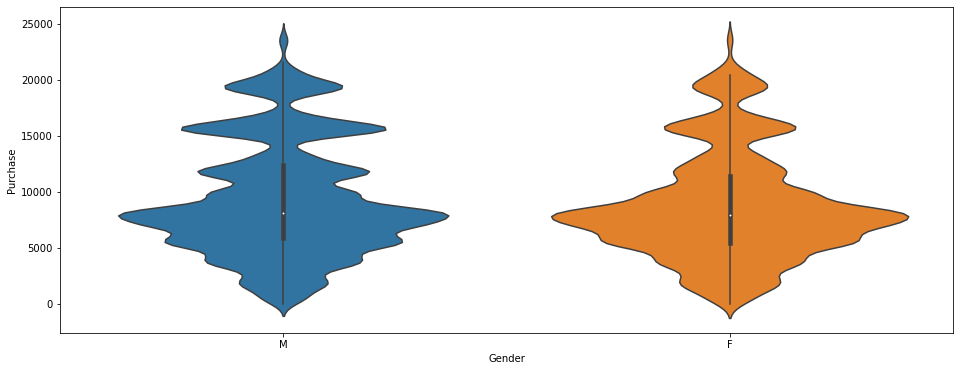

In [22]:
plt.figure(figsize=(16,6))
sns.violinplot(x='Gender', y='Purchase', split=True, data=df)

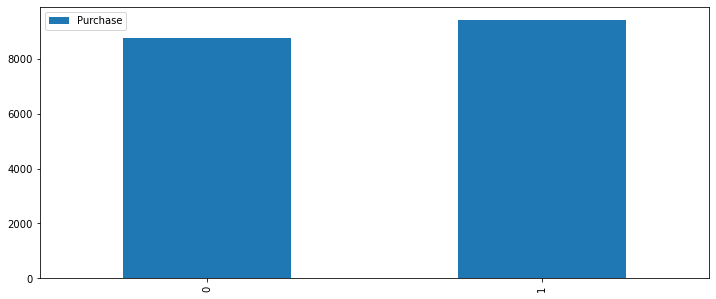

In [23]:
#Gender doesnot have much effect on purhase pattern but there are more outliers for female
df[['Gender', 'Purchase']].groupby(['Gender'], as_index=False).mean().plot.bar(figsize=(12,5));

# Age effect on purchase

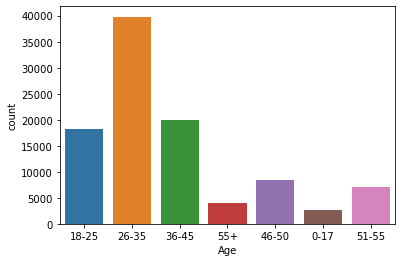

In [24]:
#There are 7 difffrent categores of age group nad age group between 26-35 purchases a lot
sns.countplot(df['Age'])

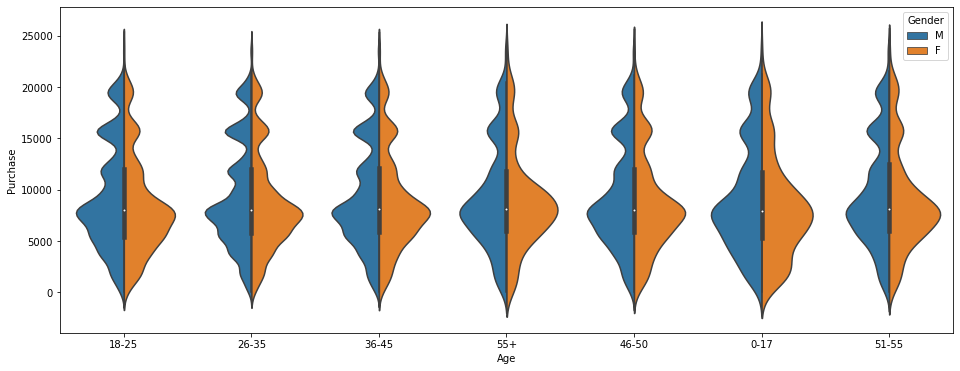

In [25]:
plt.figure(figsize=(16,6))
sns.violinplot(x='Age', y='Purchase',hue='Gender', split=True, data=df)


In [26]:
#Relationship between Gender and purchase pattern, Age has almost no effect on purchase pattern
df[['Age', 'Purchase']].groupby(['Age'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Age,Purchase
5,51-55,9548.096917
3,36-45,9308.801778
2,26-35,9274.035307
4,46-50,9209.160558
6,55+,9201.208207
1,18-25,9159.977087
0,0-17,8821.024318


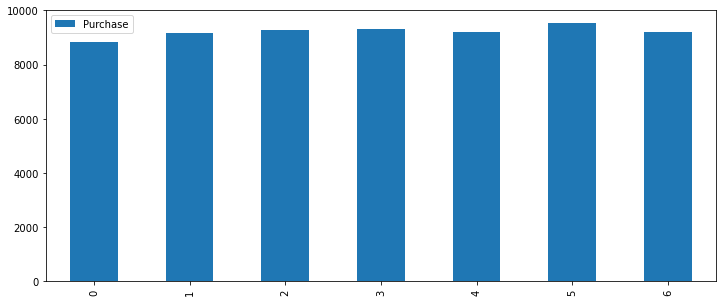

In [27]:
df[['Age', 'Purchase']].groupby(['Age'], as_index=False).mean().plot.bar(figsize=(12,5));

# City_Category effect on purchase

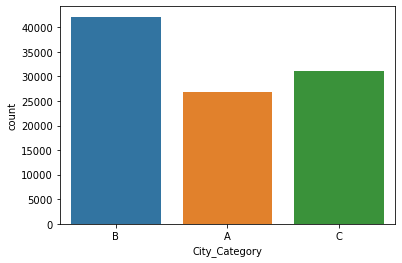

In [28]:
sns.countplot(df['City_Category'])
#B category has highest shoppers

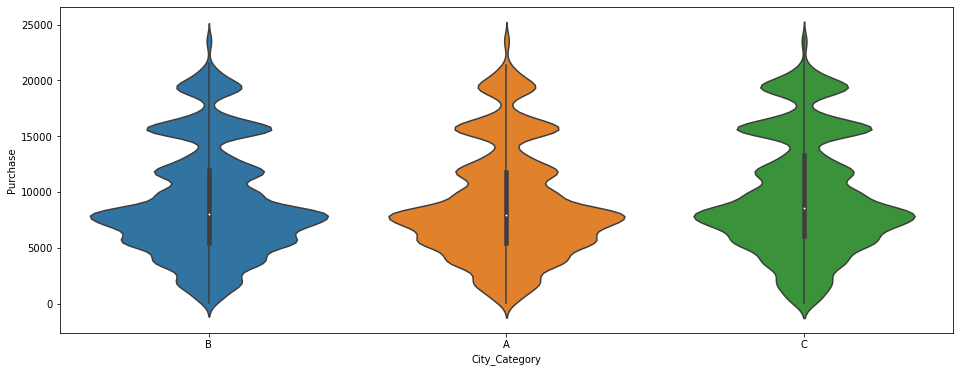

In [29]:
plt.figure(figsize=(16,6))
sns.violinplot(x='City_Category', y='Purchase', split=True, data=df)

In [30]:
#Relationship between City_Category and purchase pattern, There is no relationship between them city categories and Purchase
df[['City_Category', 'Purchase']].groupby(['City_Category'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,City_Category,Purchase
2,C,9729.457948
1,B,9131.594808
0,A,8914.807310


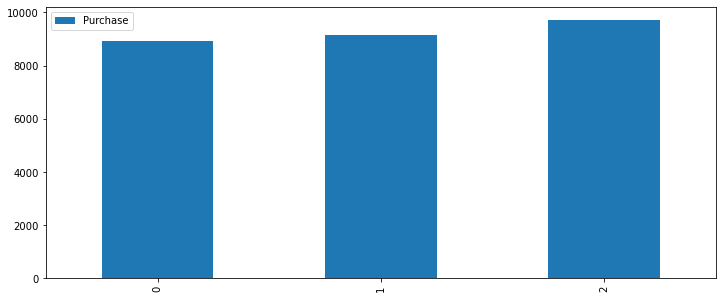

In [31]:
df[['City_Category', 'Purchase']].groupby(['City_Category'], as_index=False).mean().plot.bar(figsize=(12,5));

# Stay_In_Current_City_Years effect on purchase

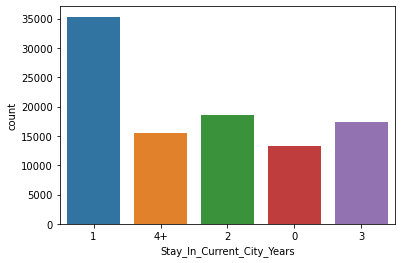

In [32]:
sns.countplot(df['Stay_In_Current_City_Years'])
#People staying in same city for 1 year purchases a lot

In [33]:
#Relationship between Stay_In_Current_City_Years and purchase pattern
df[['Stay_In_Current_City_Years', 'Purchase']].groupby(['Stay_In_Current_City_Years'], as_index=False).mean().sort_values(by='Purchase', ascending=False)
#average purchase is very close

,Stay_In_Current_City_Years,Purchase
4,4+,9324.921854
3,3,9285.578233
2,2,9273.692166
1,1,9230.147314
0,0,9202.776355


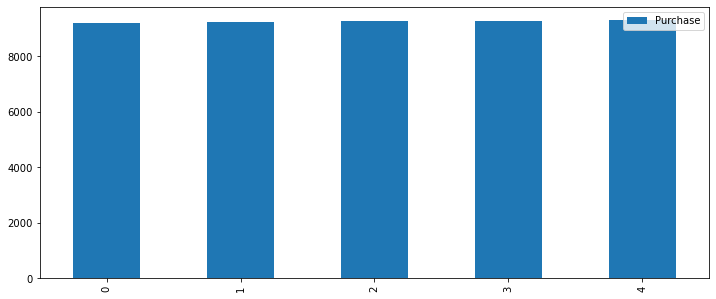

In [34]:
df[['Stay_In_Current_City_Years', 'Purchase']].groupby(['Stay_In_Current_City_Years'], as_index=False).mean().plot.bar(figsize=(12,5));

# Marital_Status effect on purchase

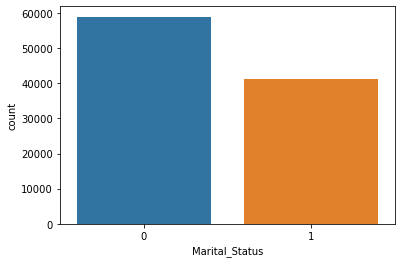

In [35]:
sns.countplot(df['Marital_Status'])
#Count of people who are not married  is high

In [36]:
#Relationship between Stay_In_Current_City_Years and purchase pattern
df[['Marital_Status', 'Purchase']].groupby(['Marital_Status'], as_index=False).mean().sort_values(by='Purchase', ascending=False)
#average puchasing amount is same for married and unmarried people

,Marital_Status,Purchase
0,0,9279.645630
1,1,9229.139662


# Product_Category_1 effect on purchase

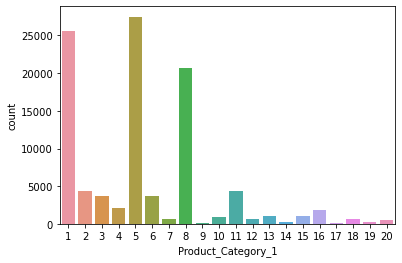

In [37]:
sns.countplot(df['Product_Category_1'])
#sales of Product_Category_1 [1,5,8] is very high

In [38]:
df[['Product_Category_1', 'Purchase']].groupby(['Product_Category_1'], as_index=False).agg({'Purchase': ['count','mean']})
#.sort_values(by='Purchase', ascending=False)
#average purchasing amount is very high for product Category 10,7,6,9,15,16
#data[["YearsAtCompany", "Attrition"]].groupby(['YearsAtCompany'], as_index=False).agg({'Attrition': ['count','mean']})

Product_Category_1 Purchase              
                         count          mean
0                   1    25529  13628.170825
1                   2     4312  11230.979824
2                   3     3739  10058.539449
3                   4     2143   2306.499300
4                   5    27478   6232.939042
5                   6     3752  15757.920842
6                   7      676  16393.025148
7                   8    20702   7489.555937
8                   9       65  15073.307692
9                  10      910  19727.471429
10                 11     4300   4680.191163
11                 12      704   1360.893466
12                 13     1052    719.369772
13                 14      297  13202.313131
14                 15     1109  14814.488729
15                 16     1779  14728.090500
16                 17      119  10461.042017
17                 18      585   2942.629060
18                 19      273     35.919414
19                 20      476    360.665966

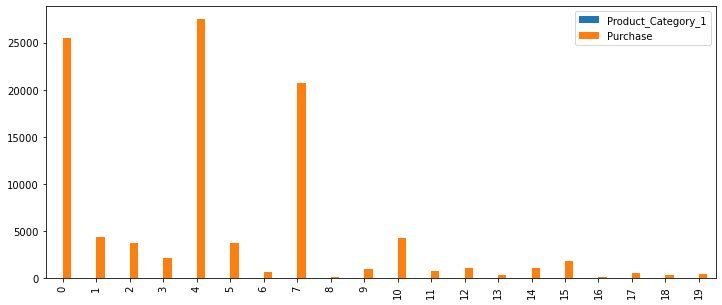

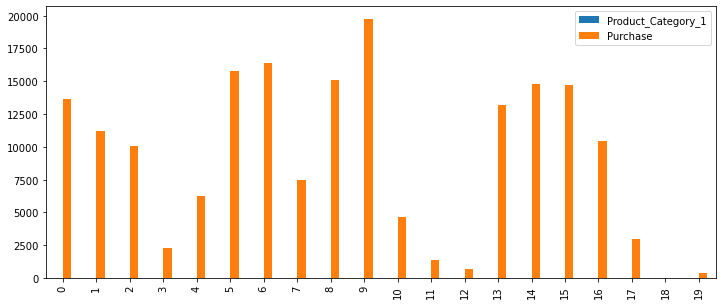

In [39]:
df[['Product_Category_1', 'Purchase']].groupby(['Product_Category_1'], as_index=False).count().plot.bar(figsize=(12,5));
df[['Product_Category_1', 'Purchase']].groupby(['Product_Category_1'], as_index=False).mean().plot.bar(figsize=(12,5));
#purchase for category 9,5,6,8,13,14,15 is very high

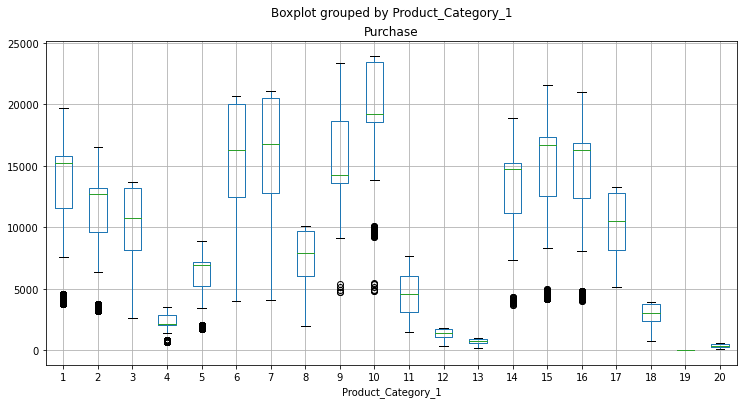

In [40]:
df.boxplot('Purchase', by='Product_Category_1', figsize=(12,6))
#Thre is too much variation in 'Product_Category_1'

# Product_Category_2 effect on purchase

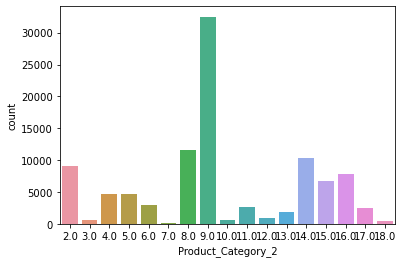

In [41]:
sns.countplot(df['Product_Category_2'])
#count of Product_Category_2 0(genereated by us),8,2, is very high

In [42]:
df[['Product_Category_2', 'Purchase']].groupby(['Product_Category_2'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Product_Category_2,Purchase
8,10.0,15563.388985
0,2.0,13634.311694
4,6.0,11542.058285
1,3.0,11217.865065
14,16.0,10313.845906
13,15.0,10297.239430
6,8.0,10268.370948
2,4.0,10201.327219
11,13.0,9594.132015
16,18.0,9529.019646


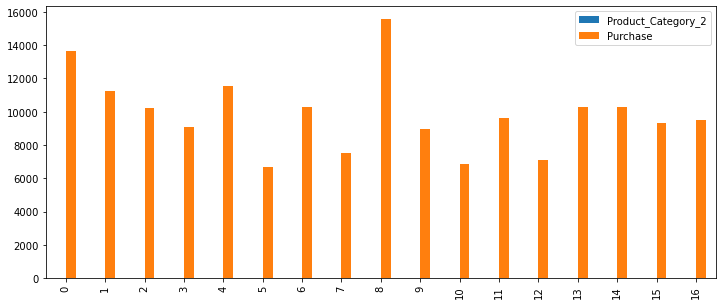

In [43]:
df[['Product_Category_2', 'Purchase']].groupby(['Product_Category_2'], as_index=False).mean().plot.bar(figsize=(12,5));
#purchase for category 10,2 is very high

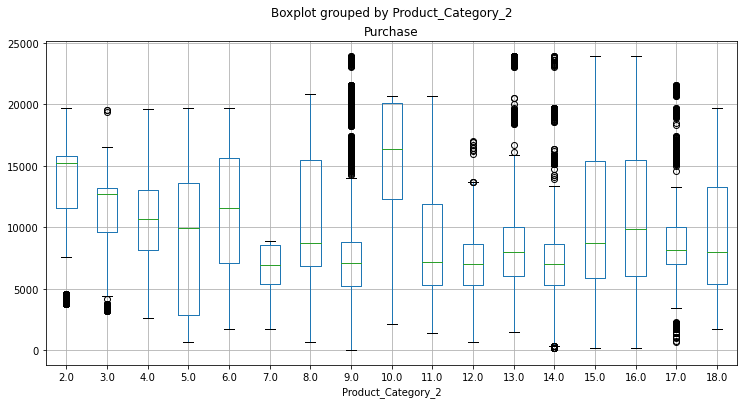

In [44]:
df.boxplot('Purchase', by='Product_Category_2', figsize=(12,6))
#There is some variation in 'Product_Category_2'

# Checking userID relations

In [45]:
df[['User_ID', 'Purchase']].groupby(['User_ID'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,User_ID,Purchase
1185,1001234,22367.333333
4382,1004542,21395.500000
4827,1005006,21386.000000
4889,1005069,21334.800000
2899,1003006,20713.000000
571,1000592,20282.000000
2121,1002197,20032.500000
2619,1002717,19933.000000
2284,1002369,19864.000000
4575,1004741,19686.500000


In [46]:
df.groupby(['User_ID'], as_index=False).mean().sort_values(by='User_ID', ascending=False)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
5828,1006040,6.0,0.0,6.030303,11.393939,7434.727273
5827,1006039,0.0,1.0,6.250000,9.900000,6199.450000
5826,1006038,1.0,0.0,5.000000,8.000000,6913.000000
5825,1006037,1.0,0.0,8.294118,10.764706,9114.588235
5824,1006036,15.0,1.0,5.923913,10.228261,7362.956522
5823,1006035,1.0,0.0,5.040000,10.760000,6325.000000
5822,1006034,14.0,0.0,6.000000,8.000000,16609.000000
5821,1006033,13.0,1.0,1.000000,6.800000,16905.000000
5820,1006032,7.0,0.0,9.285714,9.000000,9663.285714
5819,1006031,0.0,0.0,9.000000,9.500000,10645.833333


# Checking Product_ID relations

In [47]:
df[['Product_ID', 'Purchase']].groupby(['Product_ID'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Product_ID,Purchase
742,P00086242,21359.755556
1610,P00188642,21242.357143
1341,P00159142,21045.000000
1258,P00149842,20919.000000
1368,P00162142,20859.000000
986,P00119342,20850.679245
733,P00085342,20814.011765
489,P00052842,20452.522472
954,P00116142,20433.066667
813,P00100542,20307.000000


# Scatterplot of target as well as independent variable

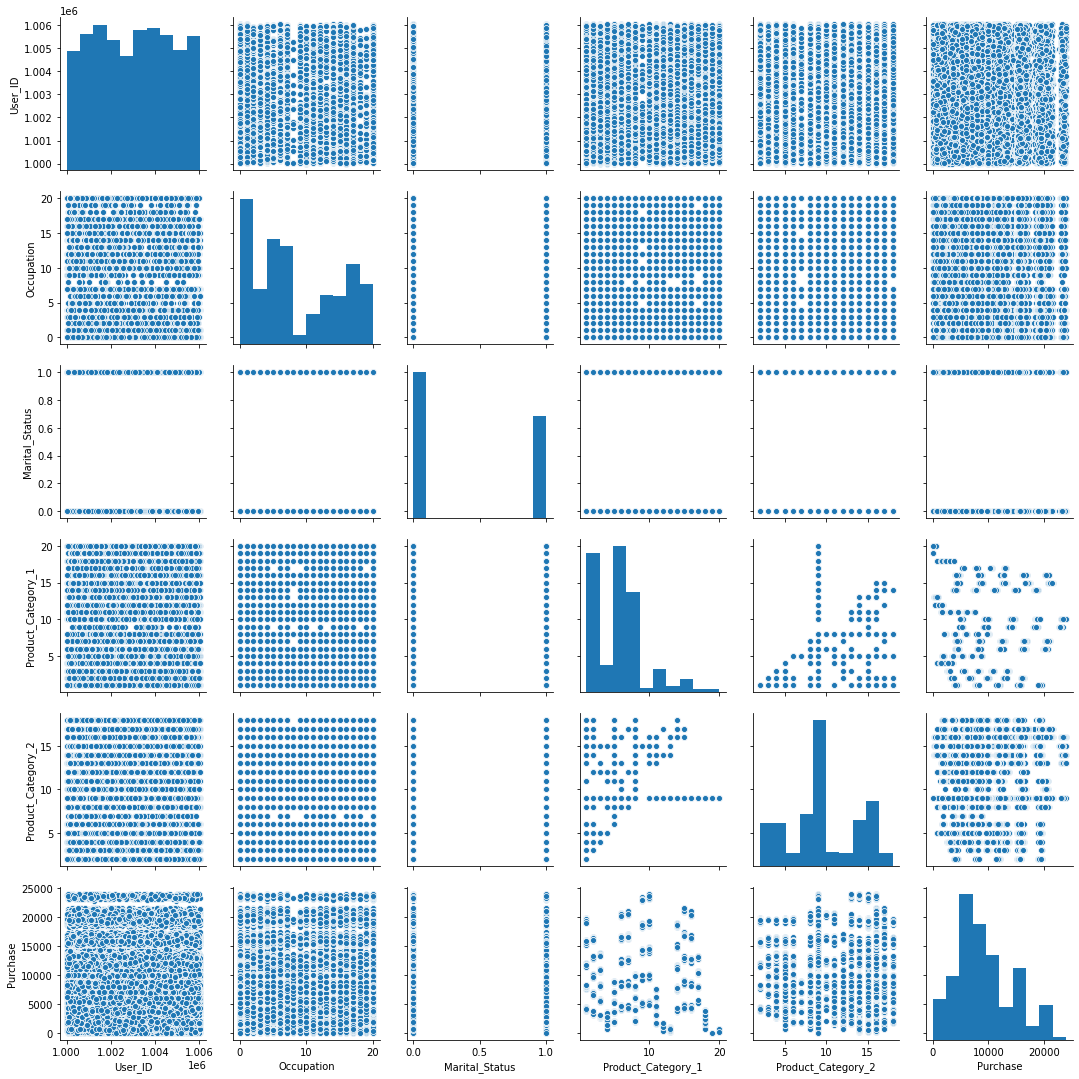

In [48]:
sns.pairplot(df)
plt.show()

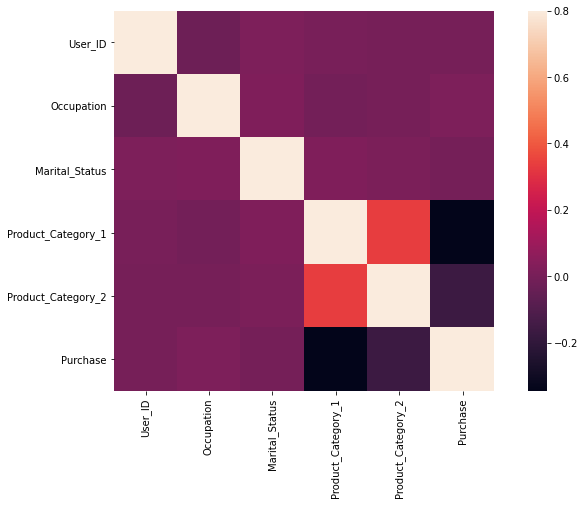

In [49]:
# Correlation Matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat, vmax=.8, square=True);

In [50]:
#Correlation of data
df = pd.DataFrame(df)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
User_ID,1,-0.025,0.018,0.0039,0.00042,0.0021
Occupation,-0.025,1,0.025,-0.0092,-0.00051,0.021
Marital_Status,0.018,0.025,1,0.023,0.015,-0.0049
Product_Category_1,0.0039,-0.0092,0.023,1,0.34,-0.35
Product_Category_2,0.00042,-0.00051,0.015,0.34,1,-0.16
Purchase,0.0021,0.021,-0.0049,-0.35,-0.16,1


In [51]:
# Lets drop less infrmation carrying information from X

segragating target and dependent variable

In [52]:
X = df[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1','Product_Category_2']]
y = df['Purchase']

In [53]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
273731,M,18-25,4,B,1,1,8,9.0
206530,M,26-35,0,A,4+,0,7,9.0
271860,M,26-35,20,A,2,0,5,9.0
170162,F,26-35,0,B,2,1,5,14.0
412155,M,36-45,11,C,4+,1,6,10.0


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [55]:
X_enc = X.apply(LabelEncoder().fit_transform) 

In [56]:
X_check_multicollin= X_enc.iloc[:]
calc_vif(X_check_multicollin)

,variables,VIF
0,Gender,3.322417
1,Age,4.385382
2,Occupation,2.476795
3,City_Category,2.676892
4,Stay_In_Current_City_Years,2.692656
5,Marital_Status,1.870711
6,Product_Category_1,2.494662
7,Product_Category_2,4.048160


In [57]:
X.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.045240,0.411350,5.398180,9.562850
std,6.513467,0.492081,3.935155,4.232863
min,0.000000,0.000000,1.000000,2.000000
25%,2.000000,0.000000,1.000000,8.000000
50%,7.000000,0.000000,5.000000,9.000000
75%,14.000000,1.000000,8.000000,14.000000
max,20.000000,1.000000,20.000000,18.000000


# mapping Age

In [58]:
cleanup_nums = {"Age" : {'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7},
                "Stay_In_Current_City_Years":{'0':0,'1':1,'2':2,'3':3,'4+':4}}

In [59]:
cleanup_nums

{'Age': {'0-17': 1,
  '18-25': 2,
  '26-35': 3,
  '36-45': 4,
  '46-50': 5,
  '51-55': 6,
  '55+': 7},
 'Stay_In_Current_City_Years': {'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4}}

In [60]:
X.replace(cleanup_nums, inplace=True)

C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


# Performing one hot encoding 

In [61]:
X_dummy=pd.get_dummies(X, columns=["Gender","Occupation","City_Category", "Marital_Status", "Product_Category_1","Product_Category_2"])

In [62]:
X_dummy.head()

,Age,Stay_In_Current_City_Years,Gender_F,Gender_M,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,...,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
273731,2,1,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
206530,3,4,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
271860,3,2,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
170162,3,2,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
412155,4,4,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [63]:
X_enc = X.apply(LabelEncoder().fit_transform) 

In [64]:
X_check_multicollin= X_enc.iloc[:]
calc_vif(X_check_multicollin)

,variables,VIF
0,Gender,3.322417
1,Age,4.385382
2,Occupation,2.476795
3,City_Category,2.676892
4,Stay_In_Current_City_Years,2.692656
5,Marital_Status,1.870711
6,Product_Category_1,2.494662
7,Product_Category_2,4.048160


In [65]:
X_dummy.columns

Index(['Age', 'Stay_In_Current_City_Years', 'Gender_F', 'Gender_M',
       'Occupation_0', 'Occupation_1', 'Occupation_2', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_20', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'Marital_Status_0', 'Marital_Status_1',
       'Product_Category_1_1', 'Product_Category_1_2', 'Product_Category_1_3',
       'Product_Category_1_4', 'Product_Category_1_5', 'Product_Category_1_6',
       'Product_Category_1_7', 'Product_Category_1_8', 'Product_Category_1_9',
       'Product_Category_1_10', 'Product_Category_1_11',
       'Product_Category_1_12', 'Product_Category_1_13',
       'Product_Category_1_14', 'Product_Category_1_15',
       'Product_Category_1_16',

# Dropping the columns to avoid dummy variable

In [66]:
del X_dummy['Gender_F']
del X_dummy['Occupation_0']
del X_dummy['Marital_Status_0']
del X_dummy['City_Category_A']
del X_dummy['Product_Category_1_1']
del X_dummy['Product_Category_2_2.0']

In [67]:
X_dummy.columns

Index(['Age', 'Stay_In_Current_City_Years', 'Gender_M', 'Occupation_1',
       'Occupation_2', 'Occupation_3', 'Occupation_4', 'Occupation_5',
       'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9',
       'Occupation_10', 'Occupation_11', 'Occupation_12', 'Occupation_13',
       'Occupation_14', 'Occupation_15', 'Occupation_16', 'Occupation_17',
       'Occupation_18', 'Occupation_19', 'Occupation_20', 'City_Category_B',
       'City_Category_C', 'Marital_Status_1', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_1_5',
       'Product_Category_1_6', 'Product_Category_1_7', 'Product_Category_1_8',
       'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18',
       'Product_Category_1_19', 'Product_Catego

#Performing standardization

# Train Test split

In [68]:
X_train, X_test, y_train, y_test = train_test_split( X_dummy, y, test_size=0.3, random_state=101)

(array([ 4733.,  7355., 16672., 13461.,  9747.,  3823.,  8206.,  1633.,
         4067.,   303.]),
 array([1.20000e+01, 2.40550e+03, 4.79900e+03, 7.19250e+03, 9.58600e+03,
        1.19795e+04, 1.43730e+04, 1.67665e+04, 1.91600e+04, 2.15535e+04,
        2.39470e+04]),
 <a list of 10 Patch objects>)

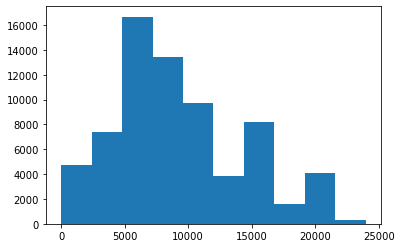

In [69]:
plt.hist(y_train)

In [70]:
X_train.describe()

,Age,Stay_In_Current_City_Years,Gender_M,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,...,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,3.493929,1.863686,0.751329,0.085214,0.049214,0.032071,0.131971,0.022057,0.035586,0.106214,...,0.325729,0.005814,0.026000,0.009800,0.018543,0.101829,0.067029,0.077457,0.024386,0.005071
std,1.356157,1.290575,0.432246,0.279202,0.216317,0.176191,0.338462,0.146870,0.185256,0.308114,...,0.468650,0.076030,0.159136,0.098509,0.134905,0.302425,0.250073,0.267317,0.154245,0.071034
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
X_train.head()

,Age,Stay_In_Current_City_Years,Gender_M,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,...,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
371927,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168982,4,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
503822,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
548555,5,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
307610,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [72]:
X_train.shape

(70000, 61)

In [73]:
y_train.shape

(70000,)

In [74]:
X_test.head()

,Age,Stay_In_Current_City_Years,Gender_M,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,...,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
179036,3,3,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
95373,2,4,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21802,2,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438564,2,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158289,6,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


# Checking R2 

In [75]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_train)

C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [76]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [77]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     2071.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:19:17   Log-Likelihood:            -6.5983e+05
No. Observations:               70000   AIC:                         1.320e+06
Df Residuals:                   69938   BIC:                         1.320e+06
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.303e+04     66.567    195.722      0.000    1.29e+04    1.32e+04
Age                           83.8627     10.332      8.117      0.000      63.613     104.113
Stay_In_Current_City_Years     4.4500      8.837      0.504      0.615     -12.870      21.770
Gender_M                     -72.1779     27.602     -2.615      0.009    -126.278     -18.078
Occupation_1                 -35.8249     50.539     -0.709      0.478    -134.882      63.232
Occupation_2                  -6.5706     60.315     -0.109      0.913    -124.788     111.647
Occupation_3                 252.6637     71.171      3.550      0.000     113.169     392.159
Occupation_4                  80.0752     45.778      1.749      0.080      -9.650     169.800
Occupation_5                 161.8658     82.953      1.951      0.051      -0.723     324.454
Occupation_6                 268.0675     68.650      3.905      0.000     133.513     402.622
Occupation_7                 138.9142     47.489      2.925      0.003      45.836     231.992
Occupation_8                -249.9383    216.422     -1.155      0.248    -674.125     174.249
Occupation_9                 223.2677    112.811      1.979      0.048       2.159     444.377
Occupation_10                223.2970     83.773      2.665      0.008      59.102     387.492
Occupation_11                 56.5041     83.712      0.675      0.500    -107.570     220.579
Occupation_12                301.4823     57.138      5.276      0.000     189.493     413.472
Occupation_13                 29.2109    107.620      0.271      0.786    -181.723     240.145
Occupation_14                 86.4631     60.327      1.433      0.152     -31.778     204.704
Occupation_15                364.5291     82.925      4.396      0.000     201.996     527.062
Occupation_16                -21.6722     62.651     -0.346      0.729    -144.469     101.124
Occupation_17                140.4152     52.705      2.664      0.008      37.113     243.717
Occupation_18               -113.7975    107.325     -1.060      0.289    -324.155      96.560
Occupation_19               -318.0777     97.284     -3.270      0.001    -508.755    -127.400
Occupation_20               -153.2514     56.421     -2.716      0.007    -263.837     -42.665
City_Category_B               90.8863     28.279      3.214      0.001      35.460     146.313
City_Category_C              555.5678     30.606     18.152      0.000     495.580     615.555
Marital_Status_1             -55.0276     24.459     -2.250      0.024    -102.966      -7.089
Product_Category_1_2       -1880.2988     75.461    -24.917      0.000   -2028.203   -1732.395
Product_Category_1_3       -2543.9871    101.590    -25.042      0.000   -2743.103   -2344.871
Product_Category_1_4       -1.108e+04     9

# Applying Linear regression model

In [78]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [79]:
regressor.intercept_

13028.58221895125

In [80]:
regressor.coef_.mean()

-1403.0072945487564

In [81]:
regressor.coef_.max()

6286.683344506942

In [82]:
regressor.coef_.min()

-13672.931538707195

In [83]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [84]:
y_pred[:5]

array([ 6046.70068467, 13174.3707458 , 13299.54118597, 13773.12262266,
        6284.93901543])

In [85]:
print('MAE :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE : 2269.5737378520384
MSE : 9001188.987507299
RMSE : 3000.198158040115


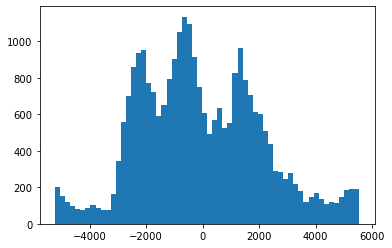

13.130449897235348 Mean error
2269.573737852028 Mean absolute error


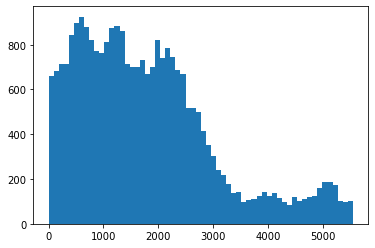

In [86]:
error = (y_pred - y_test)
error_idx = (error < np.quantile(error, 0.95)) & (error > np.quantile(error, 0.05))
_ = plt.hist(error[error_idx], bins=60)
plt.show()

_ = plt.hist(np.abs(error[error_idx]), bins=60)

print(np.mean(error), 'Mean error')
print(np.mean(np.abs(error)), 'Mean absolute error')
#print(np.median(np.abs(error)), 'Medan absolute error')

In [87]:
abs(error).median()

1763.513086516773

In [88]:
abs(error).mean()

2269.573737852028

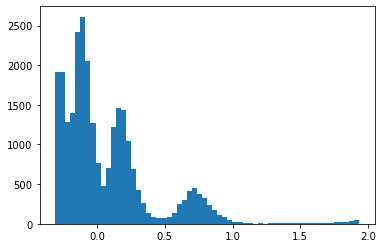

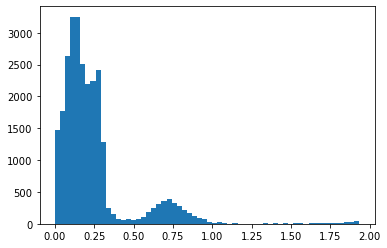

In [89]:
error = (y_pred - y_test)/ y_test
error_idx = (error < np.quantile(error, 0.95)) & (error > np.quantile(error, 0.05))
_ = plt.hist(error[error_idx], bins=60)
plt.show()

_ = plt.hist(np.abs(error[error_idx]), bins=60)

In [90]:
abs((error)).mean()

0.3756327659747028

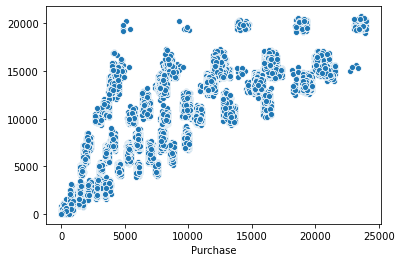

In [111]:
sns.scatterplot(y_test,y_pred )

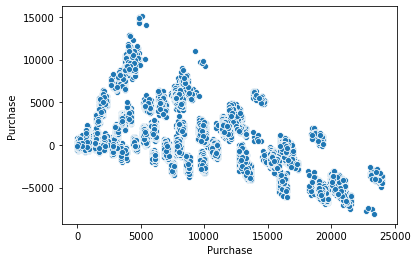

In [91]:
sns.scatterplot(y_test,(y_pred - y_test))

In [92]:
y_pred[y_pred < 0] = 0

(array([2054., 3120., 7265., 5721., 4176., 1595., 3568.,  671., 1719.,
         111.]),
 array([1.20000e+01, 2.40640e+03, 4.80080e+03, 7.19520e+03, 9.58960e+03,
        1.19840e+04, 1.43784e+04, 1.67728e+04, 1.91672e+04, 2.15616e+04,
        2.39560e+04]),
 <a list of 10 Patch objects>)

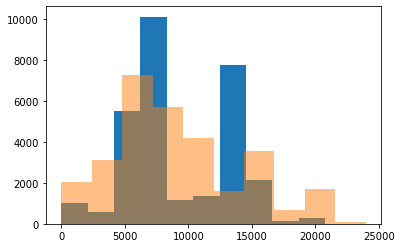

In [93]:
plt.hist(y_pred)
plt.hist(y_test, alpha=0.5)

In [94]:
y_pred.max()

20753.856299636194

#  Fitting to the decision tree to the dataset

In [95]:
Decision_Tree_regressor = DecisionTreeRegressor(random_state = 0)
Decision_Tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [96]:
# Predicting the Test set results
y_Decision_Tree_regressor_pred = Decision_Tree_regressor.predict(X_test)

In [97]:
print('MAE Decision tree:', metrics.mean_absolute_error(y_test, y_Decision_Tree_regressor_pred))
print('MSE Decision tree:', metrics.mean_squared_error(y_test, y_Decision_Tree_regressor_pred))
print('RMSE Decision tree:', np.sqrt(metrics.mean_squared_error(y_test, y_Decision_Tree_regressor_pred)))

MAE Decision tree: 2554.8830504971497
MSE Decision tree: 12887309.33130867
RMSE Decision tree: 3589.889877323352


In [98]:
#plotting graph

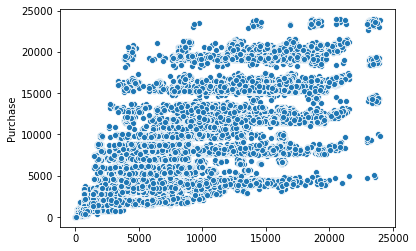

In [99]:
sns.scatterplot(y_Decision_Tree_regressor_pred, y_test)

In [120]:
abs(y_Decision_Tree_regressor_pred - y_test).median()

1847.1

In [121]:
abs(y_Decision_Tree_regressor_pred - y_test).mean()

2554.8830504971484

os.environ["PATH"] += os.pathsep + 'C:\\Users\\A691602\\Desktop\\Python\\my example\\graphviz-2.38\\release\\bin'
dot_data = tree.export_graphviz(Decision_Tree_regressor, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

# Fitting Random Forest Regression to the dataset

In [100]:
# Fitting Random Forest Regression to the dataset
Random_Forest_Regressor_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
Random_Forest_Regressor_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [101]:
Random_Forest_Regressor_regressor_pred = Random_Forest_Regressor_regressor.predict(X_test)

In [102]:
print('MAE Decision tree:', metrics.mean_absolute_error(y_test, Random_Forest_Regressor_regressor_pred))
print('MSE Decision tree:', metrics.mean_squared_error(y_test, Random_Forest_Regressor_regressor_pred))
print('RMSE Decision tree:', np.sqrt(metrics.mean_squared_error(y_test, Random_Forest_Regressor_regressor_pred)))

MAE Decision tree: 2330.954645950095
MSE Decision tree: 10085805.31881738
RMSE Decision tree: 3175.8156934585136


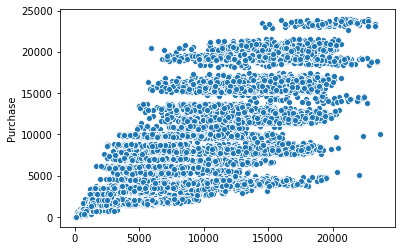

In [103]:
sns.scatterplot(Random_Forest_Regressor_regressor_pred, y_test)

In [104]:
abs(Random_Forest_Regressor_regressor_pred).mean()

9221.843600213957

In [105]:
error = (Random_Forest_Regressor_regressor_pred - y_test)

In [106]:
abs(Random_Forest_Regressor_regressor_pred - y_test).median()

1736.0904459094827

In [107]:
(abs(Random_Forest_Regressor_regressor_pred - y_test)).mean()

2330.954645950095

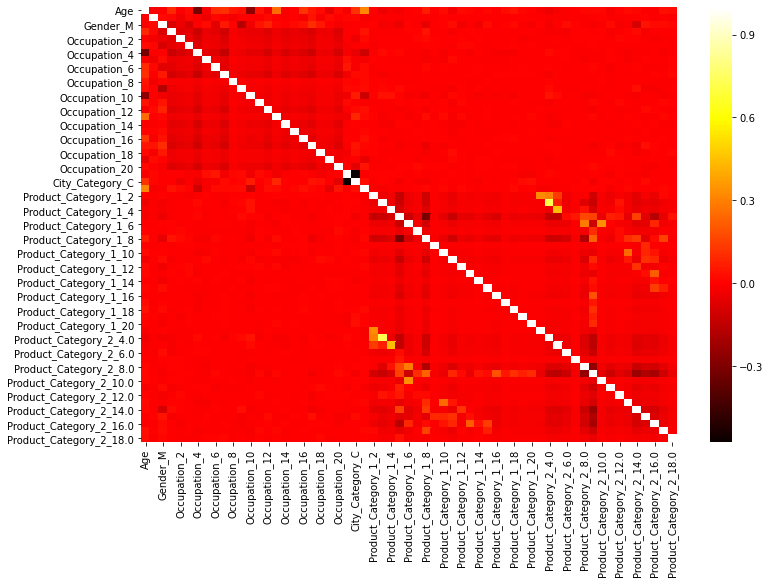

In [108]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), annot=False, cmap='hot')

In [109]:
#df = pd.DataFrame(df)
corr = X_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [110]:
X_train.columns

Index(['Age', 'Stay_In_Current_City_Years', 'Gender_M', 'Occupation_1',
       'Occupation_2', 'Occupation_3', 'Occupation_4', 'Occupation_5',
       'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9',
       'Occupation_10', 'Occupation_11', 'Occupation_12', 'Occupation_13',
       'Occupation_14', 'Occupation_15', 'Occupation_16', 'Occupation_17',
       'Occupation_18', 'Occupation_19', 'Occupation_20', 'City_Category_B',
       'City_Category_C', 'Marital_Status_1', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_1_5',
       'Product_Category_1_6', 'Product_Category_1_7', 'Product_Category_1_8',
       'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18',
       'Product_Category_1_19', 'Product_Catego